In [1]:
library(statsr)
library(dplyr)
library(ggplot2)

Loading required package: BayesFactor
Loading required package: coda
Loading required package: Matrix
************
Welcome to BayesFactor 0.9.12-4.2. If you have questions, please contact Richard Morey (richarddmorey@gmail.com).

Type BFManual() to open the manual.
************

Attaching package: ‘dplyr’

The following objects are masked from ‘package:stats’:

    filter, lag

The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union



In [2]:
data(nycflights)

In [7]:
typeof(nycflights)

[1] "list"

In [8]:
summary(nycflights)

      year          month             day           dep_time   
 Min.   :2013   Min.   : 1.000   Min.   : 1.00   Min.   :   1  
 1st Qu.:2013   1st Qu.: 4.000   1st Qu.: 8.00   1st Qu.: 908  
 Median :2013   Median : 7.000   Median :16.00   Median :1358  
 Mean   :2013   Mean   : 6.576   Mean   :15.78   Mean   :1349  
 3rd Qu.:2013   3rd Qu.:10.000   3rd Qu.:23.00   3rd Qu.:1744  
 Max.   :2013   Max.   :12.000   Max.   :31.00   Max.   :2400  
   dep_delay          arr_time      arr_delay          carrier         
 Min.   : -21.00   Min.   :   1   Min.   : -73.000   Length:32735      
 1st Qu.:  -5.00   1st Qu.:1106   1st Qu.: -17.000   Class :character  
 Median :  -2.00   Median :1537   Median :  -5.000   Mode  :character  
 Mean   :  12.71   Mean   :1503   Mean   :   7.101                     
 3rd Qu.:  11.00   3rd Qu.:1939   3rd Qu.:  14.000                     
 Max.   :1301.00   Max.   :2400   Max.   :1272.000                     
   tailnum              flight        origin    

In [3]:
names(nycflights)

[1] "year"      "month"     "day"       "dep_time"  "dep_delay" "arr_time" 
 [7] "arr_delay" "carrier"   "tailnum"   "flight"    "origin"    "dest"     
[13] "air_time"  "distance"  "hour"      "minute"

In [9]:
str(nycflights)

Classes ‘tbl_df’ and 'data.frame':	32735 obs. of  16 variables:
 $ year     : int  2013 2013 2013 2013 2013 2013 2013 2013 2013 2013 ...
 $ month    : int  6 5 12 5 7 1 12 8 9 4 ...
 $ day      : int  30 7 8 14 21 1 9 13 26 30 ...
 $ dep_time : int  940 1657 859 1841 1102 1817 1259 1920 725 1323 ...
 $ dep_delay: num  15 -3 -1 -4 -3 -3 14 85 -10 62 ...
 $ arr_time : int  1216 2104 1238 2122 1230 2008 1617 2032 1027 1549 ...
 $ arr_delay: num  -4 10 11 -34 -8 3 22 71 -8 60 ...
 $ carrier  : chr  "VX" "DL" "DL" "DL" ...
 $ tailnum  : chr  "N626VA" "N3760C" "N712TW" "N914DL" ...
 $ flight   : int  407 329 422 2391 3652 353 1428 1407 2279 4162 ...
 $ origin   : chr  "JFK" "JFK" "JFK" "JFK" ...
 $ dest     : chr  "LAX" "SJU" "LAX" "TPA" ...
 $ air_time : num  313 216 376 135 50 138 240 48 148 110 ...
 $ distance : num  2475 1598 2475 1005 296 ...
 $ hour     : num  9 16 8 18 11 18 12 19 7 13 ...
 $ minute   : num  40 57 59 41 2 17 59 20 25 23 ...


**Distribution of Departure Delays**

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


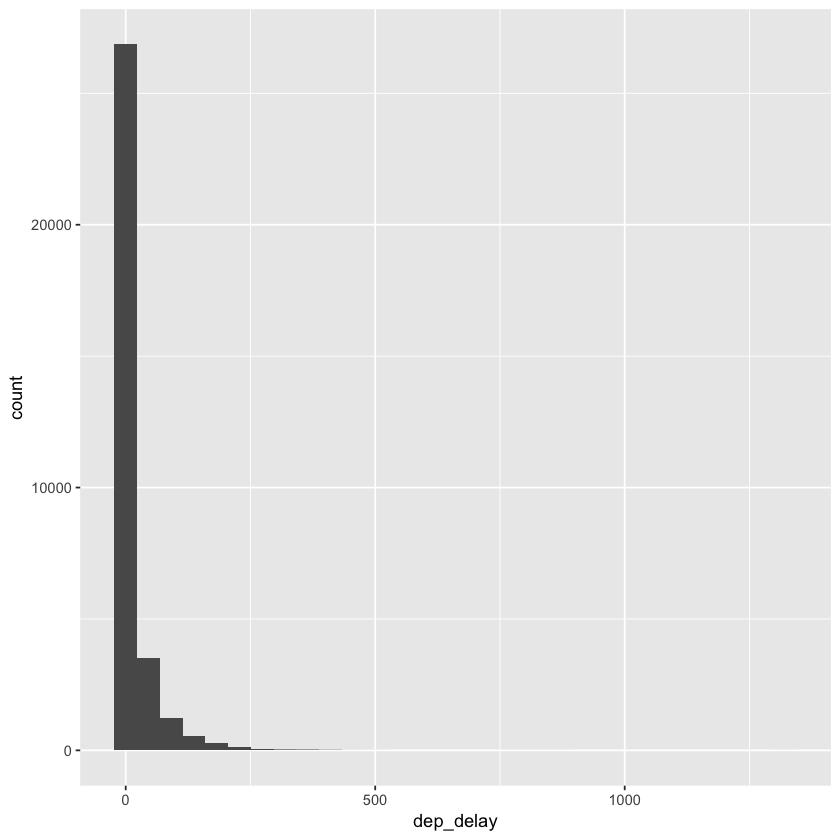

In [10]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram()

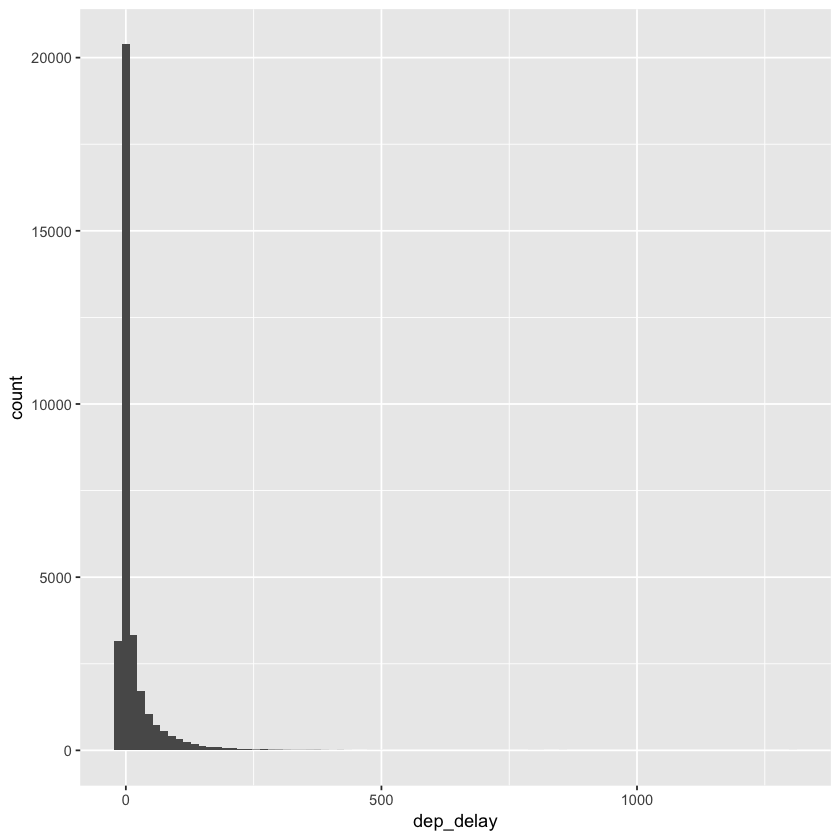

In [11]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 15)

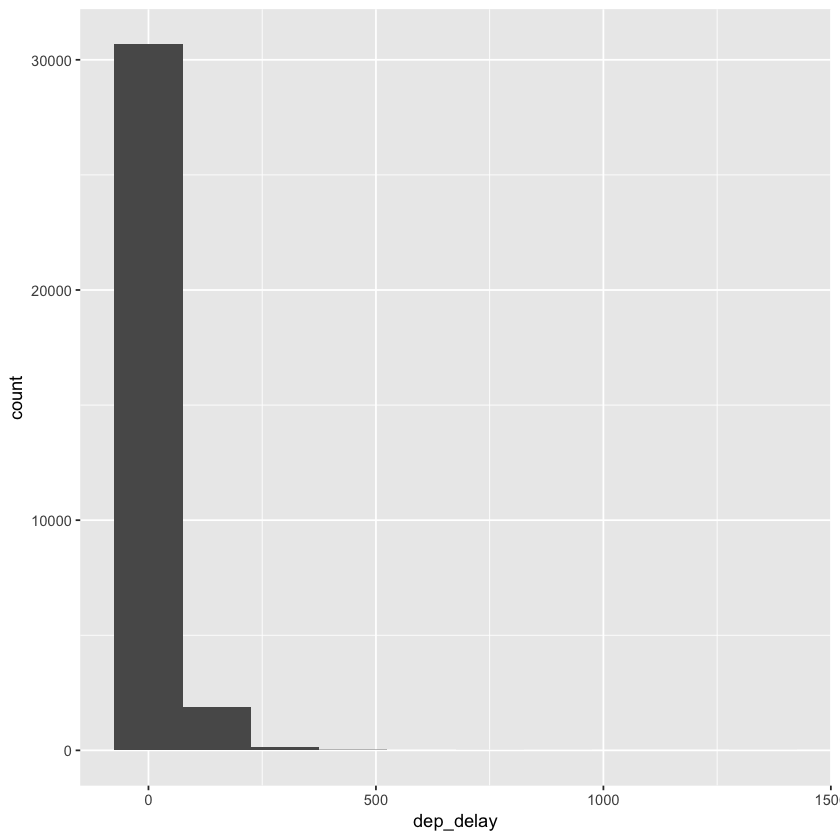

In [15]:
ggplot(data = nycflights, aes(x = dep_delay)) +
  geom_histogram(binwidth = 150)

# Q: How do these three histograms with the various binwidths compare?

# A: As the bins get wider, they "trap" more data.  That's why, for bigger bin values, they extend further along the y-axis.

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


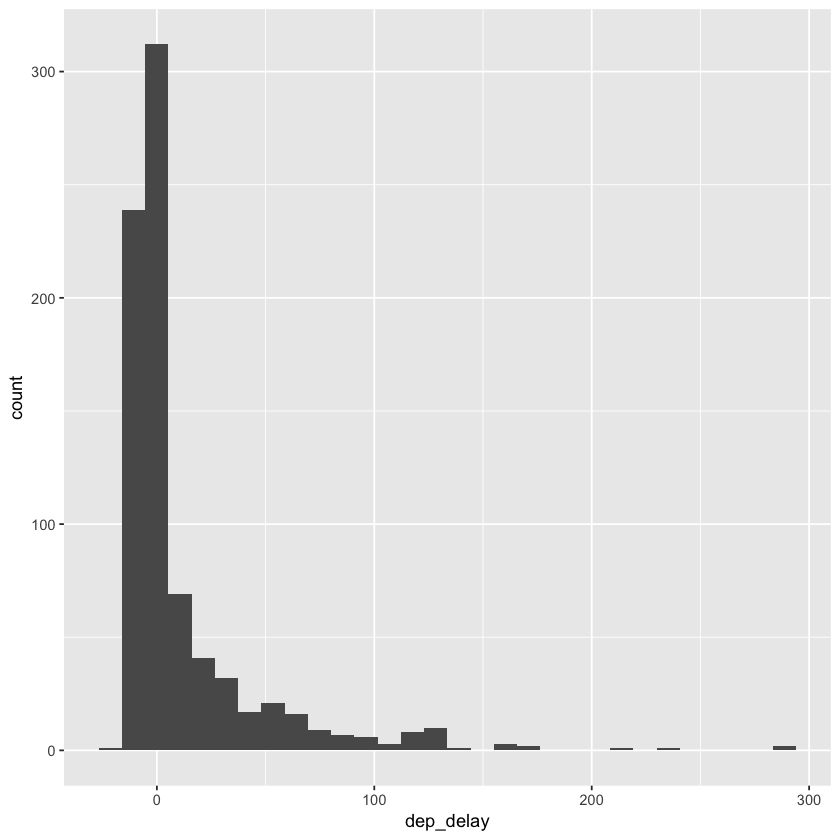

In [16]:
rdu_flights <- nycflights %>%
  filter(dest == "RDU")
ggplot(data = rdu_flights, aes(x = dep_delay)) +
  geom_histogram()

In [17]:
rdu_flights %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

mean_dd,sd_dd,n
11.69913,35.55567,801


In [18]:
sfo_feb_flights <- nycflights %>%
  filter(dest == "SFO", month == 2)

**Lists in R**

In [39]:
x <- list("a" = FALSE, "b" = TRUE, "c" = 1:10)

In [38]:
summary(x["c"])

  Length Class  Mode   
c 10     -none- numeric

# Q: Create a new data frame that includes flights headed to SFO in February, and save this data frame as sfo_feb_flights. How many flights meet these criteria?

In [44]:
nrow(sfo_feb_flights)

[1] 68

In [46]:
nrow(nycflights)

[1] 32735

# A: 68

# Q: Make a histogram and calculate appropriate summary statistics for arrival delays of sfo_feb_flights. Which of the following is false?
1. The distribution is unimodal.
2. The distribution is right skewed.
3. No flight is delayed more than 2 hours.
4. The distribution has several extreme values on the right side.
5. More than 50% of flights arrive on time or earlier than scheduled.

# A: Per the histogram, we can already see an extreme right hand value at around 200 minutes, so "No flight is delayed more than 2 hours" is false.

In [47]:
summary(sfo_feb_flights)

      year          month        day           dep_time      dep_delay    
 Min.   :2013   Min.   :2   Min.   : 1.00   Min.   : 613   Min.   :-10.0  
 1st Qu.:2013   1st Qu.:2   1st Qu.: 7.00   1st Qu.: 943   1st Qu.: -5.0  
 Median :2013   Median :2   Median :16.00   Median :1268   Median : -2.0  
 Mean   :2013   Mean   :2   Mean   :15.26   Mean   :1298   Mean   : 10.5  
 3rd Qu.:2013   3rd Qu.:2   3rd Qu.:22.50   3rd Qu.:1742   3rd Qu.:  9.0  
 Max.   :2013   Max.   :2   Max.   :28.00   Max.   :2159   Max.   :209.0  
    arr_time      arr_delay        carrier            tailnum         
 Min.   : 118   Min.   :-66.00   Length:68          Length:68         
 1st Qu.:1233   1st Qu.:-21.25   Class :character   Class :character  
 Median :1497   Median :-11.00   Mode  :character   Mode  :character  
 Mean   :1607   Mean   : -4.50                                        
 3rd Qu.:2062   3rd Qu.:  2.00                                        
 Max.   :2256   Max.   :196.00                   

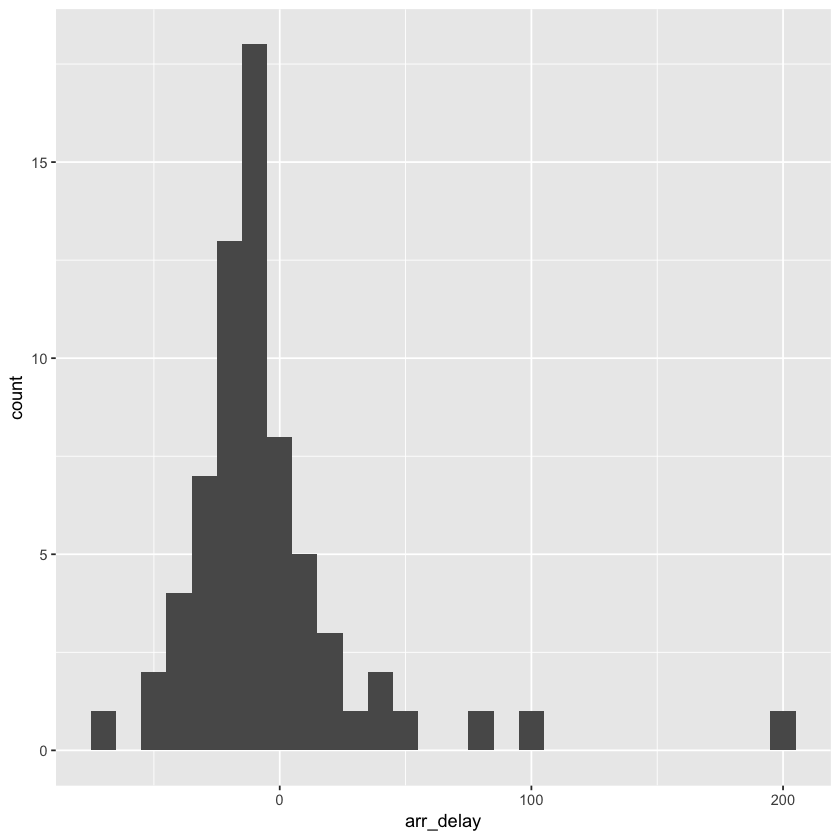

In [50]:
ggplot(data = sfo_feb_flights, aes(x = arr_delay)) +
  geom_histogram(binwidth = 10)

?nycflights

dep_delay,arr_delay
Departure and arrival delays, in minutes. Negative times represent early departures/arrivals.

In [52]:
rdu_flights %>%
  group_by(origin) %>%
  summarise(mean_dd = mean(dep_delay), sd_dd = sd(dep_delay), n = n())

origin,mean_dd,sd_dd,n
EWR,13.365517,32.08492,145
JFK,15.396667,40.30535,300
LGA,7.904494,32.18620,356


# Q: Calculate the median and interquartile range for arr_delays of flights in the sfo_feb_flights data frame, grouped by carrier. Which carrier has the hights IQR of arrival delays?
American Airlines
JetBlue Airways
Virgin America
Delta and United Airlines
Frontier Airlines

In [55]:
sfo_feb_flights %>%
    group_by(carrier) %>%
    summarize(median=median(arr_delay), iqr=IQR(arr_delay))

carrier,median,iqr
AA,5.0,17.50
B6,-10.5,12.25
DL,-15.0,22.00
UA,-10.0,22.00
VX,-22.5,21.25


# A: DL and UA

In [56]:
nycflights %>%
  group_by(month) %>%
  summarise(mean_dd = mean(dep_delay)) %>%
  arrange(desc(mean_dd))

month,mean_dd
7,20.754559
6,20.350293
12,17.368189
4,14.554477
3,13.517602
5,13.264800
8,12.619097
2,10.687227
1,10.233333
9,6.872436


# Q: Which month has the highest average departure delay from an NYC airport?
January
March
July
October
December

In [63]:
nycflights %>%
    group_by(month) %>%
    summarize(average_departure_delay=mean(dep_delay)) %>%
    filter(average_departure_delay == max(average_departure_delay))

month,average_departure_delay
7,20.75456


# A: July

# Q: Which month has the highest median departure delay from an NYC airport?
1. January
2. March
3. July
4. October
5. December

In [66]:
?nycflights

In [69]:
nycflights %>%
    group_by(month) %>%
    summarize(median_departure_delay = median(dep_delay)) %>%
    filter(median_departure_delay == max(median_departure_delay))

month,median_departure_delay
12,1


# A: December

# Q: Is the mean or the median a more reliable measure for deciding which month(s) to avoid flying if you really dislike delayed flights, and why?
1. Mean would be more reliable as it gives us the true average.
2. Mean would be more reliable as the distribution of delays is symmetric.
3. Median would be more reliable as the distribution of delays is skewed.
4. Median would be more reliable as the distribution of delays is symmetric.
5. Both give us useful information.

In [75]:
jan_flights <- nycflights %>%
    filter(month == 1)
jan_flights

year,month,day,dep_time,dep_delay,arr_time,arr_delay,carrier,tailnum,flight,origin,dest,air_time,distance,hour,minute
2013,1,1,1817,-3,2008,3,AA,N3AXAA,353,LGA,ORD,138,733,18,17
2013,1,23,2024,37,2141,29,EV,N17115,4412,EWR,BUF,53,282,20,24
2013,1,15,1626,-3,1941,10,B6,N594JB,369,LGA,PBI,150,1035,16,26
2013,1,17,626,-4,846,3,US,N554UW,1433,LGA,CLT,105,544,6,26
2013,1,8,902,-3,1006,-17,B6,N281JB,56,JFK,BTV,47,266,9,2
2013,1,15,1947,167,2241,171,AA,N5EGAA,575,JFK,EGE,265,1747,19,47
2013,1,1,1454,-4,1554,-21,EV,N11544,4390,EWR,PWM,47,284,14,54
2013,1,30,1306,-9,1430,-1,EV,N13969,4120,EWR,BUF,61,282,13,6
2013,1,4,1942,-3,2249,-40,B6,N637JB,645,JFK,SFO,333,2586,19,42
2013,1,8,1859,-6,2158,-27,AA,N322AA,21,JFK,LAX,337,2475,18,59


In [71]:
nycflights %>%
    group_by(month) %>%
    summarize(mean = mean(dep_delay), median = median(dep_delay))

month,mean,median
1,10.233333,-2
2,10.687227,-2
3,13.517602,-1
4,14.554477,-2
5,13.264800,-1
6,20.350293,0
7,20.754559,0
8,12.619097,-1
9,6.872436,-3
10,5.880374,-3


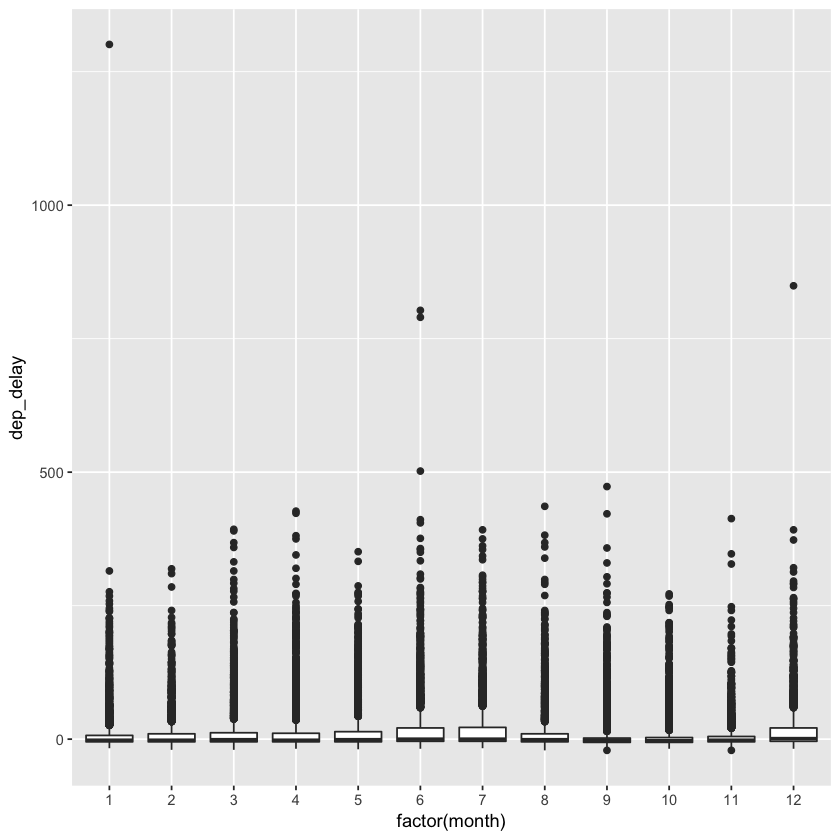

In [70]:
ggplot(nycflights, aes(x = factor(month), y = dep_delay)) +
  geom_boxplot()

# Q: If you were selecting an airport simply based on on time departure percentage, which NYC airport would you choose to fly out of?
1. EWR
2. JFK
3. LGA

In [81]:
nycflights <- nycflights %>%
  mutate(dep_type = ifelse(dep_delay < 5, "on time", "delayed"))

In [82]:
nycflights %>%
  group_by(origin) %>%
  summarise(ot_dep_rate = sum(dep_type == "on time") / n()) %>%
  arrange(desc(ot_dep_rate))

origin,ot_dep_rate
LGA,0.7279229
JFK,0.6935854
EWR,0.6369892


# A: LGA

# Q: Mutate the data frame so that it includes a new variable that contains the average speed, avg_speed traveled by the plane for each flight (in mph). What is the tail number of the plane with the fastest avg_speed? Hint: Average speed can be calculated as distance divided by number of hours of travel, and note that air_time is given in minutes. If you just want to show the avg_speed and tailnum and none of the other variables, use the select function at the end of your pipe to select just these two variables with select(avg_speed, tailnum). You can Google this tail number to find out more about the aircraft.
1. N666DN
2. N755US
3. N779JB
4. N947UW
5. N959UW

In [87]:
nycflights <- nycflights %>%
  mutate(avg_speed = air_time/distance)

In [89]:
nycflights %>% select(avg_speed, tailnum) %>% filter(avg_speed == max(avg_speed))

avg_speed,tailnum
0.78125,N755US


# A: N755US

# Q: Make a scatterplot of avg_speed vs. distance. Which of the following is true about the relationship between average speed and distance.
1. As distance increases the average speed of flights decreases.
2. The relationship is linear.
3. There is an overall postive association between distance and average speed.
4. There are no outliers.
5. The distribution of distances are uniform over 0 to 5000 miles.

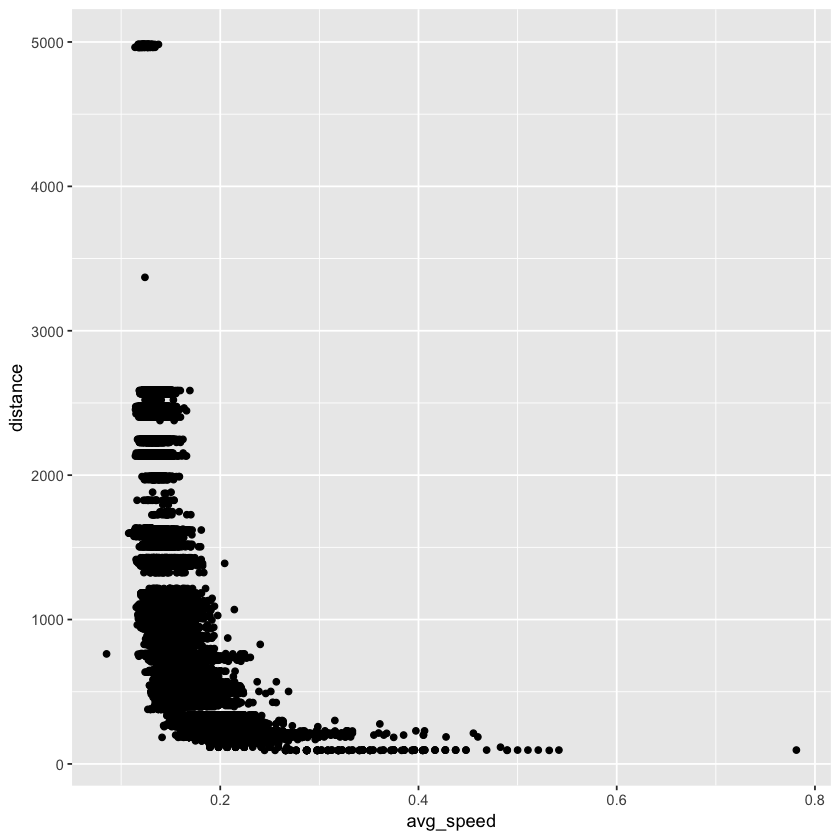

In [91]:
ggplot(nycflights, aes(x=avg_speed, y=distance)) +
  geom_point()

# A. As distance increases the average speed of flights decreases.

# Q. Suppose you define a flight to be “on time” if it gets to the destination on time or earlier than expected, regardless of any departure delays. Mutate the data frame to create a new variable called arr_type with levels "on time" and "delayed" based on this definition. Then, determine the on time arrival percentage based on whether the flight departed on time or not. What proportion of flights that were "delayed" departing arrive "on time"? [NUMERIC INPUT]

In [94]:
nycflights <- nycflights %>%
    mutate(arr_type = ifelse(arr_delay <= 0, "on time", "delayed"))

In [102]:
num_delayed <- nrow(nycflights %>% filter(dep_delay > 0))

In [103]:
num_on_time <- nrow(nycflights %>% filter(dep_delay > 0, arr_type == "on time"))

In [104]:
num_on_time/num_delayed

[1] 0.2740839

# A. 0.274083912805688